In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [45]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [46]:
verses_features

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29932,b.REV.022.017,REV,022,REV.022,apocalyptic,8693,4633,4060,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29933,b.REV.022.018,REV,022,REV.022,apocalyptic,4396,1939,2457,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29934,b.REV.022.019,REV,022,REV.022,apocalyptic,3947,1952,1995,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29935,b.REV.022.020,REV,022,REV.022,apocalyptic,11981,6014,5967,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB', 'PSA',
       'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN', 'HOS',
       'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP', 'HAG',
       'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', '1CO', '2CO',
       'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI', '2TI', 'TIT',
       'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO', '3JO', 'JUD',
       'REV'], dtype=object)

In [4]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
sexual_categories = verses_features.columns.tolist()[8:287]

In [15]:
sexual_categories

['relations',
 'monogamy',
 'poligamy',
 'marriage',
 'second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'relation-greater-family',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'primogeniture',
 'indirect-ascendant-descendant',
 'homosexual-relation',
 'acts',
 'social-related-act',
 'wedding',
 'deception',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'bath',
 'sexual-act',
 'sexual-act-stage',
 'seduction',
 'rejection',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-masturbation',
 'masturbation',
 'oral-sex',
 'anal-sex',
 'non-penetrative-sex',
 'rape',
 'fe

In [16]:
structural_categories = [column for column in verses_features.columns.tolist() if "number " in column]

In [17]:
entitiy_categories = [column for column in verses_features.columns.tolist() if "#" in column]

In [18]:
verses_features.fillna(0, inplace=True)

In [19]:
verses_features.head()

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74
0,b.GEN.001.001,GEN,001,GEN.001,historical,49268,26376,22892,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.GEN.001.002,GEN,001,GEN.001,historical,8601,3693,4908,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.GEN.001.003,GEN,001,GEN.001,historical,20970,8816,12154,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.GEN.001.004,GEN,001,GEN.001,historical,4222,2286,1936,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.GEN.001.005,GEN,001,GEN.001,historical,3208,1666,1542,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


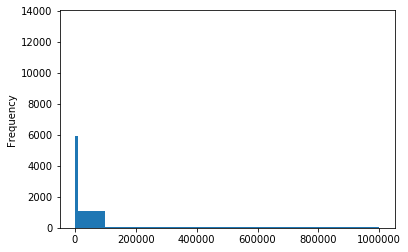

In [20]:
verses_features["twitter_freq_sum_2014_2015"].plot.hist(bins= [0,1,10,100,1000,10000,100000,1000000], )

In [21]:
verses_features[["twitter_freq_sum_2014_2015"] + structural_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015")

,twitter_freq_sum_2014_2015,number of entities referred,number of different entities referred,number of people,number of different number of people,number of groups,number of different number of groups,number of places,number of different number of places,number of times,...,number of entities receiving communication,number of different entities receiving communication,number of oral quotations,number of dream quotations,number of praying quotations,number of oath quotations,number of written quotations,number of song quotations,number of soCalled quotations,number of idea quotations
number of different entities referred,-0.098790,0.861630,1.000000,0.608524,0.663562,0.491548,0.569029,0.461817,0.496932,0.043375,...,0.422829,0.421289,0.372996,0.012262,-0.036723,0.029836,0.041036,0.024611,0.038807,0.168077
number of entities referred,-0.097373,1.000000,0.861630,0.749784,0.589509,0.594575,0.498309,0.420746,0.396722,0.040180,...,0.536721,0.479069,0.505546,0.011899,-0.039839,0.033299,0.021421,0.010198,0.088183,0.328434
number of different number of places,-0.070671,0.396722,0.496932,0.028243,-0.015864,0.076442,0.097179,0.933792,1.000000,-0.005669,...,-0.011274,-0.044857,0.013815,-0.007294,-0.057550,0.006843,-0.031840,0.002004,-0.011071,0.026202
number of places,-0.069327,0.420746,0.461817,0.030689,-0.017209,0.073932,0.090936,1.000000,0.933792,-0.009330,...,0.013066,-0.025761,0.036324,-0.009085,-0.058030,0.005796,-0.031274,0.000480,-0.009865,0.055335
number of different number of people,-0.063402,0.589509,0.663562,0.851513,1.000000,-0.010715,-0.027749,-0.017209,-0.015864,-0.027668,...,0.354973,0.383245,0.266000,0.035681,0.060004,0.019933,-0.015229,0.013274,-0.009123,0.101675
number of people,-0.062609,0.749784,0.608524,1.000000,0.851513,0.059832,0.021518,0.030689,0.028243,-0.016719,...,0.445144,0.427071,0.391915,0.032770,0.040159,0.029073,-0.019813,-0.000011,0.012904,0.260712
number of oral quotations,-0.059922,0.505546,0.372996,0.391915,0.266000,0.408416,0.339488,0.036324,0.013815,0.001932,...,0.824594,0.763388,1.000000,-0.021543,-0.196907,-0.005415,-0.053408,-0.050899,0.030593,0.383139
number of groups,-0.053192,0.594575,0.491548,0.059832,-0.010715,1.000000,0.855314,0.073932,0.076442,0.001639,...,0.412504,0.354551,0.408416,-0.015146,-0.087814,0.021047,0.081459,0.020424,0.157177,0.234906
number of 2nd level quotations,-0.051578,0.459266,0.307253,0.314882,0.166883,0.392226,0.304165,0.078089,0.056217,0.006144,...,0.713426,0.593909,0.681385,0.048899,-0.031534,0.027639,0.114729,0.004389,0.193433,0.610231
number of entities communicating,-0.049395,0.543200,0.382099,0.430015,0.280537,0.437798,0.351630,0.022632,-0.003571,-0.004209,...,0.908669,0.837017,0.857355,0.031151,0.081879,0.034683,0.122925,0.039896,0.166883,0.595636


In [22]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
twitter_freq_sum_2014_2015,1.000000,0.011876,0.003538,0.005160,0.018548,0.032480,0.003335,0.003076,-0.000593,-0.003307,...,-0.000986,-0.000986,-0.000975,-0.002181,-0.002184,-0.002190,-0.003377,-0.013284,-0.003339,-0.002217
#org0,0.032480,-0.001148,0.061948,0.083858,0.005320,1.000000,-0.007993,-0.002020,-0.007310,-0.002392,...,-0.002224,-0.002224,-0.002224,-0.004973,-0.004973,-0.004973,-0.007171,-0.027687,-0.003889,-0.005339
#per17,0.018548,0.012787,0.002184,-0.003938,1.000000,0.005320,-0.003407,-0.002461,-0.001730,0.006903,...,-0.000526,-0.000526,-0.000526,-0.001177,-0.001177,-0.001177,-0.002050,-0.007793,-0.001790,-0.001264
#pla18,0.014680,0.011341,0.022136,0.088399,0.019143,0.039284,0.000503,-0.002762,-0.001942,-0.002550,...,-0.000591,-0.000591,-0.000591,-0.001321,-0.001321,-0.001321,-0.002301,-0.003665,-0.002009,-0.001418
#tim3,0.011876,1.000000,0.007597,0.038143,0.012787,-0.001148,-0.001154,-0.000833,-0.000586,-0.000769,...,-0.000178,-0.000178,-0.000178,-0.000399,-0.000399,-0.000399,-0.000694,-0.003127,-0.000606,-0.000428
#pla41,0.005160,0.038143,0.072467,1.000000,-0.003938,0.083858,0.028298,0.015296,0.012676,-0.004022,...,0.027799,0.027799,-0.000932,-0.002084,-0.002084,-0.002084,-0.003629,-0.002175,-0.003169,-0.002237
#per14,0.003538,0.007597,1.000000,0.072467,0.002184,0.061948,0.016887,0.016539,0.016199,-0.000009,...,-0.004264,-0.004264,-0.004264,-0.009535,-0.009535,-0.009535,-0.004076,0.024504,-0.007880,-0.010236
#per145,0.003335,-0.001154,0.016887,0.028298,-0.003407,-0.007993,1.000000,0.453052,0.126569,0.018601,...,-0.000216,-0.000216,-0.000216,-0.000483,-0.000483,-0.000483,-0.000842,-0.003792,-0.000735,-0.000519
#per20,0.003106,0.023788,0.016588,0.019054,0.001009,0.014229,0.009033,0.091130,0.027065,-0.001713,...,-0.000397,-0.000397,-0.000397,-0.000888,-0.000888,-0.000888,-0.001546,-0.005767,-0.001350,-0.000953
#per241,0.003076,-0.000833,0.016539,0.015296,-0.002461,-0.002020,0.453052,1.000000,0.041122,-0.000674,...,-0.000156,-0.000156,-0.000156,-0.000349,-0.000349,-0.000349,-0.000608,-0.002739,-0.000531,-0.000375


In [24]:
verses_features[["twitter_freq_sum_2014_2015"] + entitiy_categories[0:150]].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).tail(20)

,twitter_freq_sum_2014_2015,#tim3,#per14,#pla41,#per17,#org0,#per145,#per241,#pla77,#pla39,...,#pla105,#pla106,#tim15,#per199,#per200,#per451,#per156,#per2,#per141,#per148
#per162,-0.004011,-0.001009,-0.004873,0.025870,-0.002980,-0.010378,-0.001224,-0.000884,-0.000622,-0.000816,...,-0.000189,-0.000189,-0.000189,-0.000423,-0.000423,-0.000423,-0.000736,-0.003317,-0.000643,-0.000454
#pla101,-0.004030,-0.000761,-0.006947,0.001356,-0.002249,-0.006090,-0.000924,-0.000667,-0.000469,-0.000616,...,-0.000143,-0.000143,-0.000143,-0.000319,-0.000319,-0.000319,-0.000556,0.094847,-0.000485,-0.000343
#per168,-0.004041,-0.000718,-0.017166,0.002674,-0.002120,-0.008954,-0.000870,-0.000629,-0.000442,-0.000580,...,-0.000134,-0.000134,-0.000134,0.099735,-0.000301,-0.000301,-0.000524,-0.002359,-0.000457,-0.000323
#per158,-0.004078,-0.000993,-0.002702,0.021491,-0.002934,-0.009550,-0.001205,-0.000870,-0.000612,-0.000803,...,-0.000186,-0.000186,-0.000186,-0.000416,-0.000416,-0.000416,-0.000725,-0.003265,-0.000633,-0.000447
#org54,-0.004405,-0.000819,-0.000098,-0.004284,-0.002421,-0.003729,-0.000994,-0.000718,-0.000505,-0.000663,...,-0.000154,-0.000154,-0.000154,-0.000343,-0.000343,-0.000343,-0.000598,-0.002694,-0.000522,-0.000369
#per144,-0.004543,-0.001078,-0.007059,0.021792,-0.003183,-0.011497,-0.001307,-0.000944,-0.000664,-0.000872,...,-0.000202,-0.000202,0.211931,-0.000452,-0.000452,-0.000452,-0.000786,-0.003542,-0.000687,-0.000485
#pla81,-0.004600,-0.000814,-0.007343,-0.004254,-0.002404,0.005375,-0.000987,-0.000713,-0.000501,-0.000658,...,-0.000153,-0.000153,-0.000153,-0.000341,-0.000341,-0.000341,-0.000594,-0.002675,-0.000519,-0.000366
#pla64,-0.004624,-0.000929,0.000274,-0.004856,-0.002743,-0.010548,-0.001127,-0.000814,-0.000572,0.043694,...,-0.000174,-0.000174,-0.000174,-0.000389,-0.000389,-0.000389,-0.000678,0.010916,-0.000592,-0.000418
#pla23,-0.004942,-0.000982,0.020187,0.001461,-0.002900,0.005665,-0.001191,-0.000860,-0.000605,-0.000794,...,-0.000184,-0.000184,-0.000184,-0.000411,-0.000411,-0.000411,-0.000717,-0.003228,-0.000626,-0.000442
#org122,-0.005577,-0.003333,-0.011091,-0.011168,-0.008390,0.008415,-0.004043,-0.002920,-0.002053,-0.002696,...,-0.000625,-0.000625,-0.000625,-0.001397,-0.001397,-0.001397,-0.002433,-0.008079,-0.002124,-0.001500


In [25]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(20)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,night,sunrise,seasons,winter,valorations,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
twitter_freq_sum_2014_2015,1.000000,-0.001836,-0.001150,-0.003326,-0.005460,-0.000829,NaN,-0.000663,-0.000456,-0.002278,...,-0.001368,-0.000945,NaN,-0.000692,0.010534,0.037612,-0.006065,-0.004078,-0.009591,0.003219
love,0.056886,-0.001344,-0.001164,-0.002072,0.013740,-0.000672,NaN,-0.000475,-0.001778,-0.001063,...,0.099419,-0.000475,NaN,0.070299,-0.001063,0.134184,0.464021,0.051062,0.062594,0.006676
blessed-aspect,0.037612,-0.000965,-0.000836,-0.001488,-0.002754,-0.000483,NaN,-0.000341,-0.001277,-0.000763,...,-0.000483,-0.000341,NaN,-0.000341,-0.000763,1.000000,0.025105,0.011561,0.023023,0.038393
flesh,0.028337,-0.000613,-0.000531,-0.000945,-0.001748,-0.000306,NaN,-0.000217,-0.000811,-0.000484,...,-0.000306,-0.000217,NaN,-0.000217,-0.000484,0.058458,0.126499,0.146515,0.159732,0.064076
body,0.016920,-0.000867,-0.000751,-0.001337,0.011093,-0.000434,NaN,-0.000307,-0.001147,-0.000686,...,-0.000434,-0.000307,NaN,-0.000307,-0.000686,0.039799,0.075900,0.066565,0.065416,0.100106
veil,0.015501,-0.000094,-0.000082,-0.000146,-0.000270,-0.000047,NaN,-0.000033,-0.000125,-0.000075,...,-0.000047,-0.000033,NaN,-0.000033,-0.000075,-0.000341,-0.000719,-0.000417,-0.000574,-0.000389
song,0.013488,-0.000094,-0.000082,-0.000146,-0.000270,-0.000047,NaN,-0.000033,-0.000125,-0.000075,...,-0.000047,-0.000033,NaN,-0.000033,-0.000075,-0.000341,0.046472,-0.000417,-0.000574,-0.000389
men,0.013017,0.467488,-0.000433,-0.000771,0.069003,-0.000250,NaN,-0.000177,-0.000662,-0.000395,...,-0.000250,-0.000177,NaN,-0.000177,-0.000395,0.053910,0.067573,-0.002207,0.030320,-0.002059
valorations,0.010534,-0.000211,-0.000183,-0.000326,-0.000603,-0.000106,NaN,-0.000075,-0.000280,-0.000167,...,-0.000106,-0.000075,NaN,-0.000075,1.000000,-0.000763,-0.001607,-0.000932,-0.001283,-0.000870
homosexuals,0.005084,-0.000094,-0.000082,-0.000146,-0.000270,-0.000047,NaN,-0.000033,-0.000125,-0.000075,...,-0.000047,-0.000033,NaN,-0.000033,-0.000075,-0.000341,-0.000719,-0.000417,-0.000574,0.085873


In [26]:
verses_features[["twitter_freq_sum_2014_2015"] + sexual_categories].corr( ).sort_values(by="twitter_freq_sum_2014_2015", ascending=False).head(100)

,twitter_freq_sum_2014_2015,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,second-marriage-widow,interfaith-marriage,interfaith-relation,...,night,sunrise,seasons,winter,valorations,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect
twitter_freq_sum_2014_2015,1.000000,-0.001836,-0.001150,-0.003326,-0.005460,-0.000829,NaN,-0.000663,-0.000456,-0.002278,...,-0.001368,-0.000945,NaN,-0.000692,0.010534,0.037612,-0.006065,-0.004078,-0.009591,0.003219
love,0.056886,-0.001344,-0.001164,-0.002072,0.013740,-0.000672,NaN,-0.000475,-0.001778,-0.001063,...,0.099419,-0.000475,NaN,0.070299,-0.001063,0.134184,0.464021,0.051062,0.062594,0.006676
blessed-aspect,0.037612,-0.000965,-0.000836,-0.001488,-0.002754,-0.000483,NaN,-0.000341,-0.001277,-0.000763,...,-0.000483,-0.000341,NaN,-0.000341,-0.000763,1.000000,0.025105,0.011561,0.023023,0.038393
flesh,0.028337,-0.000613,-0.000531,-0.000945,-0.001748,-0.000306,NaN,-0.000217,-0.000811,-0.000484,...,-0.000306,-0.000217,NaN,-0.000217,-0.000484,0.058458,0.126499,0.146515,0.159732,0.064076
body,0.016920,-0.000867,-0.000751,-0.001337,0.011093,-0.000434,NaN,-0.000307,-0.001147,-0.000686,...,-0.000434,-0.000307,NaN,-0.000307,-0.000686,0.039799,0.075900,0.066565,0.065416,0.100106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lips,-0.001203,-0.000327,-0.000284,-0.000505,-0.000934,-0.000164,NaN,-0.000116,-0.000433,-0.000259,...,-0.000164,-0.000116,NaN,-0.000116,-0.000259,-0.001182,0.133763,0.021807,0.031972,-0.001348
face,-0.001208,-0.000134,-0.000116,-0.000206,-0.000381,-0.000067,NaN,-0.000047,-0.000177,-0.000106,...,-0.000067,-0.000047,NaN,-0.000047,-0.000106,-0.000483,0.032353,-0.000590,-0.000811,-0.000550
wheat,-0.001221,-0.000134,-0.000116,-0.000206,-0.000381,-0.000067,NaN,-0.000047,-0.000177,-0.000106,...,-0.000067,-0.000047,NaN,-0.000047,-0.000106,-0.000483,0.032353,-0.000590,-0.000811,-0.000550
goat,-0.001244,-0.000134,-0.000116,-0.000206,-0.000381,-0.000067,NaN,-0.000047,-0.000177,-0.000106,...,-0.000067,-0.000047,NaN,-0.000047,-0.000106,-0.000483,0.065722,-0.000590,-0.000811,-0.000550


In [27]:
verses_features["twitter_freq_sum_2014_2015"].sort_values()

13939         0
11369         8
10423         9
11341         9
10417         9
          ...  
25979    299317
15765    328235
25441    331092
29307    360391
28327    875311
Name: twitter_freq_sum_2014_2015, Length: 29937, dtype: int64

In [28]:
verses_features.loc[verses_features["twitter_freq_sum_2014_2015"] == 1]

,bible_identifier,bible_book,bible_chapter,bible_book_chapter,genre,twitter_freq_sum_2014_2015,twitter_freq_2014,twitter_freq_2015,relations,monogamy,...,#org35,#org439,#pla65,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74


In [30]:
verses_features[verses_features["coitus"] > 0 ]["bible_identifier"].values.tolist()

['b.GEN.004.001',
 'b.GEN.004.017',
 'b.GEN.004.025',
 'b.GEN.016.002',
 'b.GEN.016.003',
 'b.GEN.016.004',
 'b.GEN.020.004',
 'b.GEN.024.016',
 'b.GEN.024.067',
 'b.GEN.026.010',
 'b.GEN.029.023',
 'b.GEN.029.030',
 'b.GEN.030.003',
 'b.GEN.030.004',
 'b.GEN.030.016',
 'b.GEN.034.002',
 'b.GEN.034.007',
 'b.GEN.035.022',
 'b.GEN.038.002',
 'b.GEN.038.016',
 'b.GEN.038.018',
 'b.GEN.039.007',
 'b.GEN.039.010',
 'b.GEN.039.012',
 'b.GEN.039.014',
 'b.GEN.039.015',
 'b.GEN.039.017',
 'b.GEN.039.018',
 'b.GEN.049.004',
 'b.RUT.004.013',
 'b.1SA.001.019',
 'b.MAT.001.025',
 'b.MAT.019.005',
 'b.MAT.019.006',
 'b.JOH.008.004',
 'b.JOH.008.005']

In [31]:
verses_features["number of 1st level quotations"].sum()

18311.0

In [44]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB', 'PSA',
       'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN', 'HOS',
       'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP', 'HAG',
       'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', '1CO', '2CO',
       'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI', '2TI', 'TIT',
       'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO', '3JO', 'JUD',
       'REV'], dtype=object)

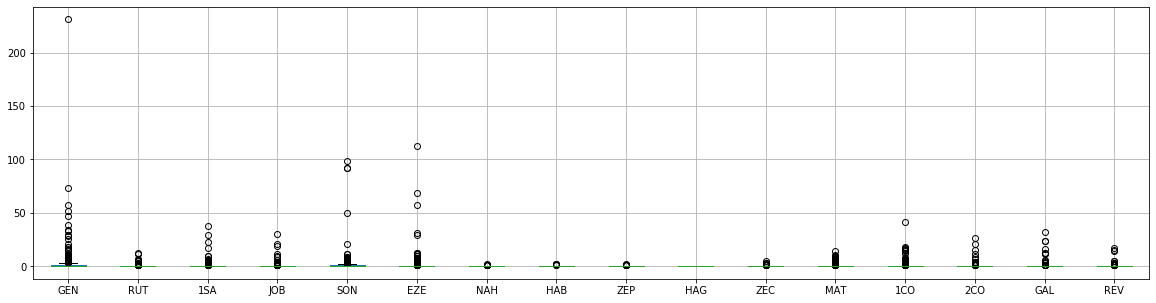

In [41]:
verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN","RUT","1SA","JOB", "SON","EZE" , "NAH",
"HAB",
"ZEP",
"HAG",
"ZEC",
"MAT", #"ROM",
"1CO",
"2CO",
"GAL",
"REV",]].boxplot(figsize=(20,5))

In [42]:
verses_features[sexual_categories].sum().sort_values()

body-by-gender            0
by-corporal-traits        0
sexual-act-situation      0
other-sexual-act          0
voyerism                  0
                       ... 
neutral-aspect          155
love                    201
negative-aspect         292
ascendant-descendant    411
positive-aspect         456
Length: 279, dtype: int64